In [149]:
# !pip install folium

In [47]:
import pandas as pd

aerim_df2 = pd.read_pickle('aerim_df.pkl')

In [48]:
#서울시의 위도, 경도 범위 밖인 건물/상호명에 대하여 인덱스 추출
# 37.66478856,127.03646484: 북
# 37.48115796,126.82482678: 서
# 37.54487716,127.18269439: 동
# 37.44758943,127.04579711: 남

idx = []
for i in range(len(aerim_df2)):
    lat = float(aerim_df2.loc[i,'위도'])
    lang = float(aerim_df2.loc[i,'경도'])
    if  lat<37.4 or lat>37.7:
        idx.append(i)
    elif lang<126.8 or lang>127.2:
        idx.append(i)
idx

[144]

In [49]:
#확인해보기

aerim_df2.loc[idx]

,지역(행정구),건물/상호명,흡연시설형태,세부 주소,세부 주소_clean,위도,경도
144,영등포구,한양아이클래스,개방형,서울 영등포구 영신로 228-6,서울 영등포구 영신로 228-6,32.5273,126.9042


In [54]:
#다시 selenium을 활용해서  위도, 경도 채워주기

import selenium
import time
from selenium  import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

path = 'c:/cakd7/tool/chromedriver.exe'
url = 'https://earth.google.com/web/search/'

driver = webdriver.Chrome(path)


#위도값이 null값인 행의 인덱스를 추출하여, 세부주소로 위도, 경도 크롤링 하기

for i in idx:
    j = aerim_df2.loc[i,'세부 주소_clean']
    driver.get(url+j)
    time.sleep(15)
    try:
        now_url = driver.current_url
        split_url = now_url.split('@')[1]
        split_url = split_url.split(',')
        aerim_df2.loc[i, '위도'] = split_url[0]
        aerim_df2.loc[i, '경도'] = split_url[1]
    except:
        pass

driver.close()


In [55]:
#확인해보기

idx = []
for i in range(len(aerim_df2)):
    lat = float(aerim_df2.loc[i,'위도'])
    lang = float(aerim_df2.loc[i,'경도'])
    if  lat<37.4 or lat>37.7:
        idx.append(i)
    elif lang<126.8 or lang>127.2:
        idx.append(i)
idx

[]

In [56]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)


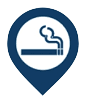
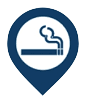
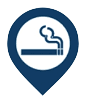
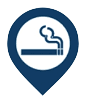
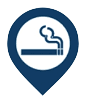
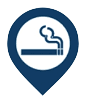
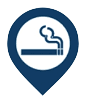
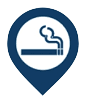
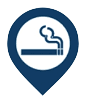
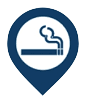
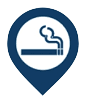
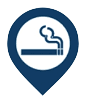
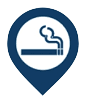
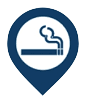
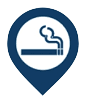
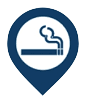
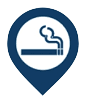
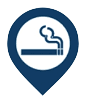
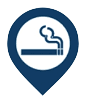
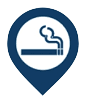
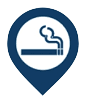
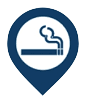
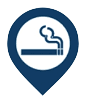
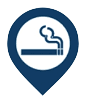
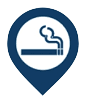
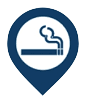
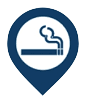
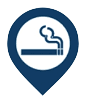
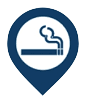
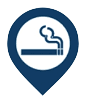
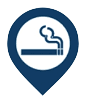
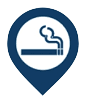
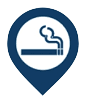
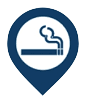
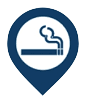
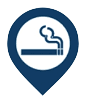
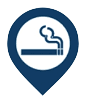
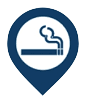
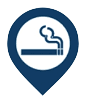
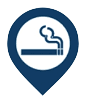
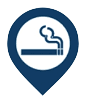
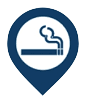
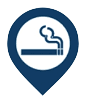
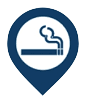
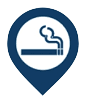
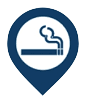
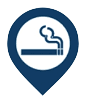
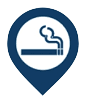
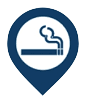
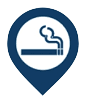
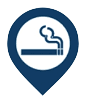
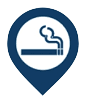
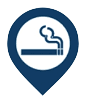
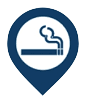
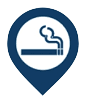
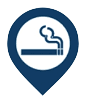
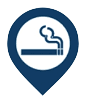
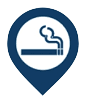
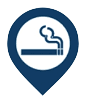
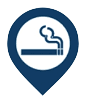
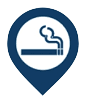
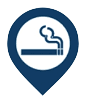
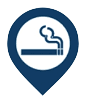
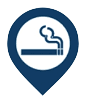
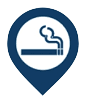
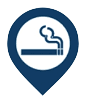
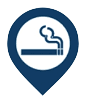
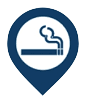
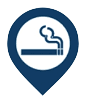
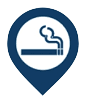
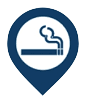
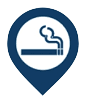
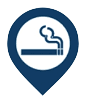
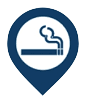
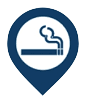
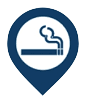
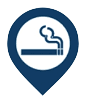
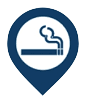
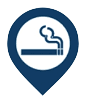
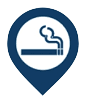
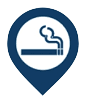
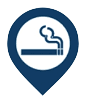
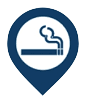
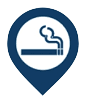
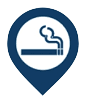
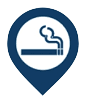
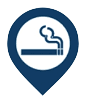
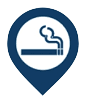
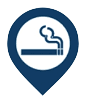
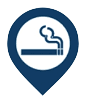
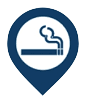
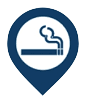
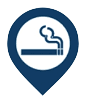
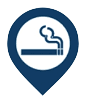
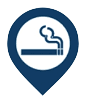
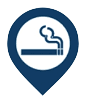
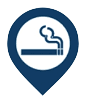
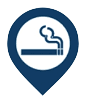
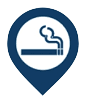
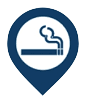
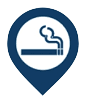
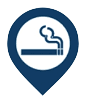
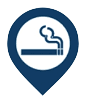
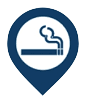
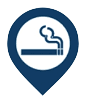
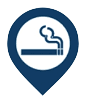
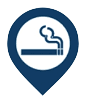
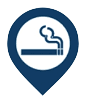
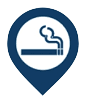
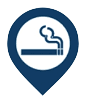
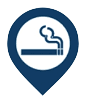
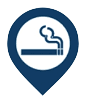
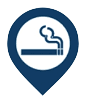
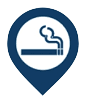
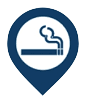
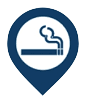
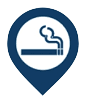
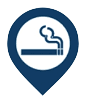
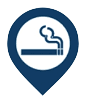
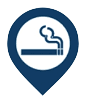
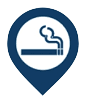
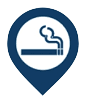
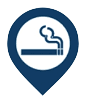
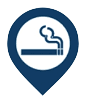
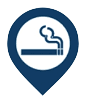
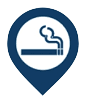
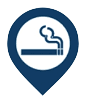
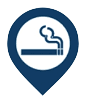
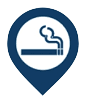
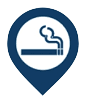
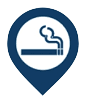
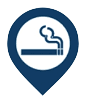
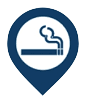
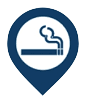
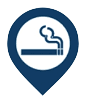
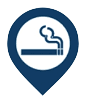
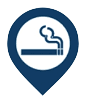
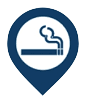
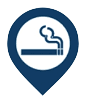
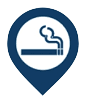
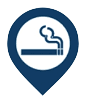
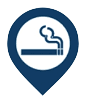
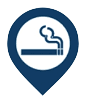
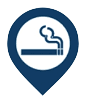
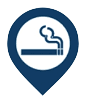
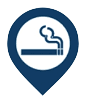
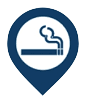
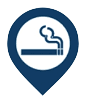
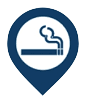
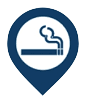
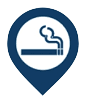
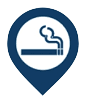
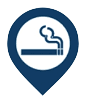
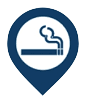
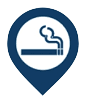
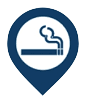
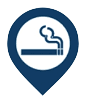
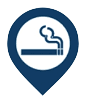
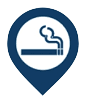
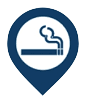
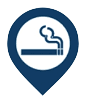
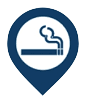
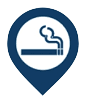
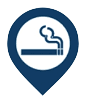
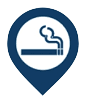
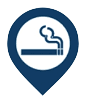
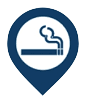
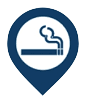
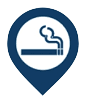
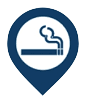
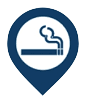
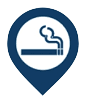
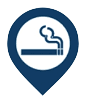
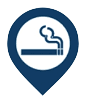
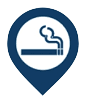
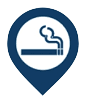
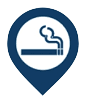
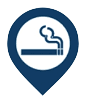
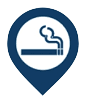
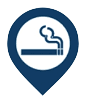
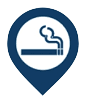
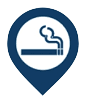
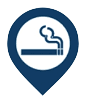
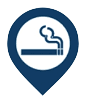
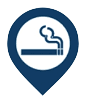
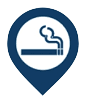
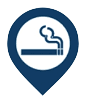
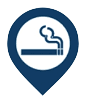
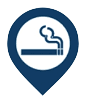
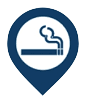
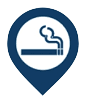
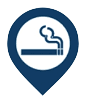
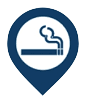
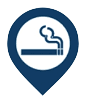
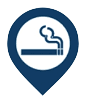
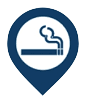
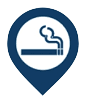
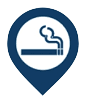
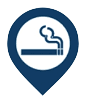
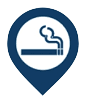
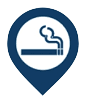
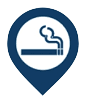
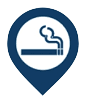

In [57]:
import folium 
import warnings
warnings.filterwarnings('ignore')

center = [37.541, 126.986]
icon = ['star','flag']
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap']

m =folium.Map(location = center,
                           zoom_start=14,
                           width = 750,
                           height = 500,
                           tiles = tiles[2] )

for i in  range(len(aerim_df2)):
    lat = aerim_df2.loc[ i, '위도']
    lang =aerim_df2.loc[ i, '경도']
    name = aerim_df2.loc[ i, '건물/상호명']+'('+ aerim_df2.loc[ i, '흡연시설형태']+')'
    folium.Marker(
        location = [lat, lang],
        tooltip = name,
        icon = folium.features.CustomIcon( 'smoke.png', icon_size=(35, 45))
                          ).add_to(m)

folium.GeoJson(
    seoul_geo,
    name='지역구',
    style_function = lambda x: {'fillColor':'#00000000' ,
                                                      'color':'darkblue',
                                                      'weight' :'2'}
                        ).add_to(m)

m